In [2]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io


In [3]:
df=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rain Category 1901-2010.csv",index_col=0)
df

,zone1,zone2,zone3,zone4,zone5,zone6
0,3,3,4,4,4,4
1,4,4,4,4,3,4
2,4,4,5,4,4,4
3,3,4,3,4,3,3
4,3,4,4,4,3,2
...,...,...,...,...,...,...
105,5,4,4,3,4,5
106,4,4,6,5,4,5
107,4,5,4,4,4,3
108,4,3,4,4,3,4


In [26]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


# Create a GMM model with 9 clusters
n_clusters = 9
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the model to your data
gmm.fit(df)

cluster_labels = gmm.predict(df)

print("Cluster Labels:", cluster_labels)


Cluster Labels: [4 8 3 4 4 8 8 0 6 3 4 8 8 0 4 6 0 1 0 2 8 7 8 3 4 6 8 4 8 4 8 4 0 0 8 7 8
 0 4 8 8 0 8 0 6 0 0 4 8 8 4 4 6 8 0 0 8 8 0 8 5 2 8 3 4 4 8 4 4 0 6 4 0 1
 0 6 6 8 4 6 5 4 0 8 4 4 1 3 8 8 3 8 8 5 8 3 8 3 4 3 8 1 6 4 8 5 5 4 4 6]


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
values=cluster_labels
vals=[i for i in values]
vals


[4,
 8,
 3,
 4,
 4,
 8,
 8,
 0,
 6,
 3,
 4,
 8,
 8,
 0,
 4,
 6,
 0,
 1,
 0,
 2,
 8,
 7,
 8,
 3,
 4,
 6,
 8,
 4,
 8,
 4,
 8,
 4,
 0,
 0,
 8,
 7,
 8,
 0,
 4,
 8,
 8,
 0,
 8,
 0,
 6,
 0,
 0,
 4,
 8,
 8,
 4,
 4,
 6,
 8,
 0,
 0,
 8,
 8,
 0,
 8,
 5,
 2,
 8,
 3,
 4,
 4,
 8,
 4,
 4,
 0,
 6,
 4,
 0,
 1,
 0,
 6,
 6,
 8,
 4,
 6,
 5,
 4,
 0,
 8,
 4,
 4,
 1,
 3,
 8,
 8,
 3,
 8,
 8,
 5,
 8,
 3,
 8,
 3,
 4,
 3,
 8,
 1,
 6,
 4,
 8,
 5,
 5,
 4,
 4,
 6]

In [28]:
cnt=[0 for i in range(9)]
for i in range(len(vals)):
    cnt[vals[i]-1]+=1
cnt

[4, 2, 9, 26, 5, 11, 2, 33, 18]

In [16]:
# df = pd.DataFrame(values, columns=(['Cluster Number']))
# df.to_csv('Cluster Number 1901-2010.csv')

In [28]:
# labels = kmeans.labels_
# labels
km.inertia_

91.98768453768452

In [8]:
years_Cluster={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[]
}

years_Cluster_not_indexs={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[]
}

yr=1901
indx=0
for i in range(len(values)):
    years_Cluster[values[i]].append(indx)
    years_Cluster_not_indexs[values[i]].append(yr)
    indx+=1
    yr+=1

years_Cluster

{0: [10, 14, 37, 47, 67, 68, 81, 90, 99],
 1: [3, 4, 27, 31, 50, 84, 93],
 2: [7,
  16,
  21,
  22,
  30,
  43,
  51,
  53,
  57,
  65,
  74,
  78,
  80,
  96,
  103,
  104,
  108,
  109],
 3: [6,
  11,
  12,
  15,
  20,
  26,
  28,
  29,
  36,
  39,
  42,
  48,
  49,
  56,
  59,
  62,
  69,
  77,
  82,
  87,
  88,
  91],
 4: [2, 9, 17, 23, 33, 46, 63, 71, 95, 101],
 5: [0, 5, 34, 38, 52, 64, 70, 79, 100, 105],
 6: [24, 32, 55, 58, 61, 72, 92, 94, 107],
 7: [1, 13, 19, 35, 40, 45, 60, 66, 73, 83, 86, 98],
 8: [8, 18, 25, 41, 44, 54, 75, 76, 85, 89, 97, 102, 106]}

In [119]:
def PlotMap(data,cluster=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])
    

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Cluster {cluster}')
    
    #plt.savefig(f'Cluster {cluster}.png', dpi=100, bbox_inches='tight')


In [9]:
def PlotMap(data):
    # Create a figure and axis for the plot
    fig, axes = plt.subplots(1, 9, figsize=(75, 5)) 
    
    for i, ax in enumerate(axes.ravel()):
        # Create a colormap
        cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

        # Determine the appropriate color limits based on your data
        vmin = -1.0  # Minimum value for the color scale
        vmax = 1.0  # Maximum value for the color scale

        # Plot the average yearly rainfall data using the colormap
        im = ax.imshow(data[i], cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                       extent=[data[i]['lon'].min(), data[i]['lon'].max(),
                               data[i]['lat'].min(), data[i]['lat'].max()])


        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, label='Rainfall')

        # Set axis labels
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(f'Cluster {i+1}')
    
#     plt.savefig(f'Clusters.png')


In [10]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]

#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))

In [11]:
def getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster1_years):
    cluster_zone1=[]
    cluster_zone2=[]
    cluster_zone3=[]
    cluster_zone4=[]
    cluster_zone5=[]
    cluster_zone6=[]

    for i in cluster1_years:
        cluster_zone1.append(zone1[i])
        cluster_zone2.append(zone2[i])
        cluster_zone3.append(zone3[i])
        cluster_zone4.append(zone4[i])
        cluster_zone5.append(zone5[i])
        cluster_zone6.append(zone6[i])

    cluster_zone1_combined=xarray.concat(cluster_zone1,dim='years')
    cluster_zone2_combined=xarray.concat(cluster_zone2,dim='years')
    cluster_zone3_combined=xarray.concat(cluster_zone3,dim='years')
    cluster_zone4_combined=xarray.concat(cluster_zone4,dim='years')
    cluster_zone5_combined=xarray.concat(cluster_zone5,dim='years')
    cluster_zone6_combined=xarray.concat(cluster_zone6,dim='years')


    cluster_zone1_mean=cluster_zone1_combined['rain'].mean(dim='years')
    cluster_zone2_mean=cluster_zone2_combined['rain'].mean(dim='years')
    cluster_zone3_mean=cluster_zone3_combined['rain'].mean(dim='years')
    cluster_zone4_mean=cluster_zone4_combined['rain'].mean(dim='years')
    cluster_zone5_mean=cluster_zone5_combined['rain'].mean(dim='years')
    cluster_zone6_mean=cluster_zone6_combined['rain'].mean(dim='years')


    cluster_fullMap=cluster_zone1_mean.combine_first(cluster_zone2_mean.combine_first(cluster_zone3_mean.combine_first(cluster_zone4_mean.combine_first(cluster_zone5_mean.combine_first(cluster_zone6_mean)))))
    
    return cluster_fullMap

In [12]:
#Getting the cluster zonal data and meaning them
cluster1_years=years_Cluster[0]
cluster2_years=years_Cluster[1]
cluster3_years=years_Cluster[2]
cluster4_years=years_Cluster[3]
cluster5_years=years_Cluster[4]
cluster6_years=years_Cluster[5]
cluster7_years=years_Cluster[6]
cluster8_years=years_Cluster[7]
cluster9_years=years_Cluster[8]

cluster1_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster1_years)
cluster2_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster2_years)
cluster3_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster3_years)
cluster4_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster4_years)
cluster5_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster5_years)
cluster6_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster6_years)
cluster7_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster7_years)
cluster8_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster8_years)
cluster9_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,cluster9_years)


In [124]:
PlotMap(cluster1_fullMap,cluster=1)
PlotMap(cluster2_fullMap,cluster=2)
PlotMap(cluster3_fullMap,cluster=3)
PlotMap(cluster4_fullMap,cluster=4)
PlotMap(cluster5_fullMap,cluster=5)
PlotMap(cluster6_fullMap,cluster=6)
PlotMap(cluster7_fullMap,cluster=7)
PlotMap(cluster8_fullMap,cluster=8)
PlotMap(cluster9_fullMap,cluster=9)


TypeError: PlotMap() got an unexpected keyword argument 'cluster'

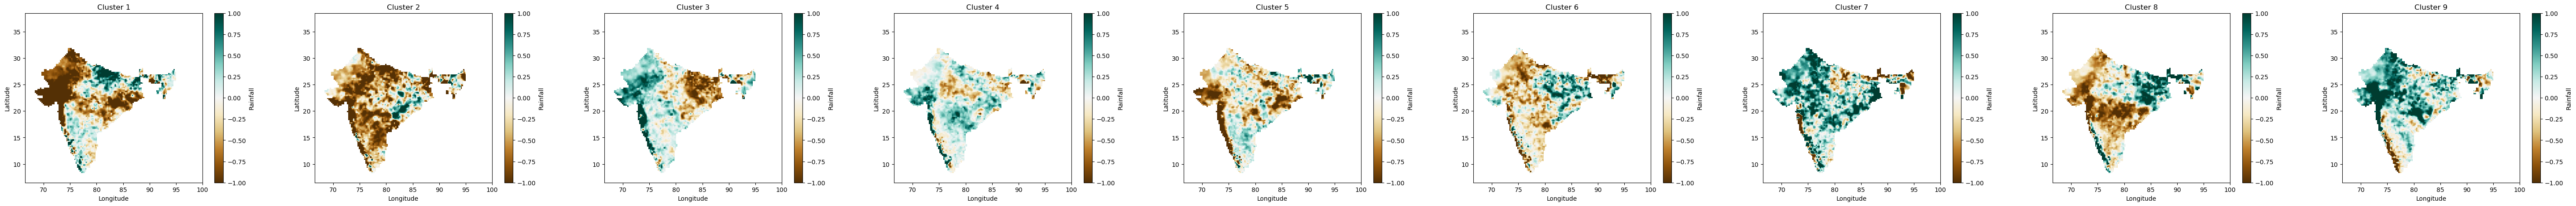

In [13]:
arr=[cluster1_fullMap,cluster2_fullMap,cluster3_fullMap,cluster4_fullMap,cluster5_fullMap,cluster6_fullMap,
    cluster7_fullMap,cluster8_fullMap,cluster9_fullMap]
PlotMap(arr)


In [25]:
#Accessing the zone files
zone1_predict=[]
zone2_predict=[]
zone3_predict=[]
zone4_predict=[]
zone5_predict=[]
zone6_predict=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]

#Storing the paths in a array
for i in range(2011,2023):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1_predict.append(xarray.open_dataset(path1[i]))
    zone2_predict.append(xarray.open_dataset(path2[i]))
    zone3_predict.append(xarray.open_dataset(path3[i]))
    zone4_predict.append(xarray.open_dataset(path4[i]))
    zone5_predict.append(xarray.open_dataset(path5[i]))
    zone6_predict.append(xarray.open_dataset(path6[i]))

In [26]:
predict_category=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rain Category 2011-2022.csv",index_col=0)
predict_category

,zone1,zone2,zone3,zone4,zone5,zone6
0,6,4,5,3,4,5
1,4,4,5,3,4,4
2,5,4,4,4,5,5
3,4,3,4,4,3,4
4,4,3,4,4,3,2
5,4,4,4,4,4,4
6,4,3,4,5,3,4
7,4,4,4,4,4,4
8,5,4,5,4,5,6
9,5,4,6,5,4,5


In [27]:
predicted=km.predict(predict_category)

In [28]:
predicted

array([0, 4, 0, 6, 1, 3, 6, 3, 0, 4, 3, 8])

In [29]:
maps_of_predicts=[]
for i in range(len(zone1_predict)):
    maps_of_predicts.append(xarray.merge([zone1_predict[i], zone2_predict[i], zone3_predict[i], zone4_predict[i], zone5_predict[i], zone6_predict[i]]))
    

In [30]:
len(maps_of_predicts)

12

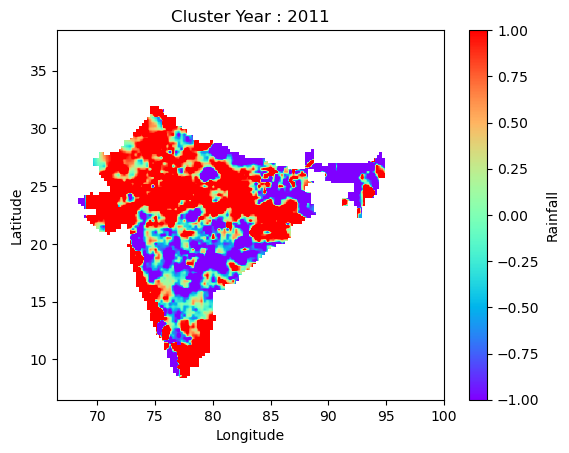

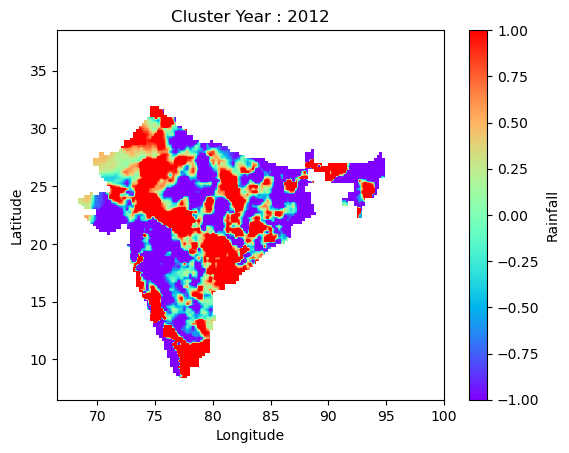

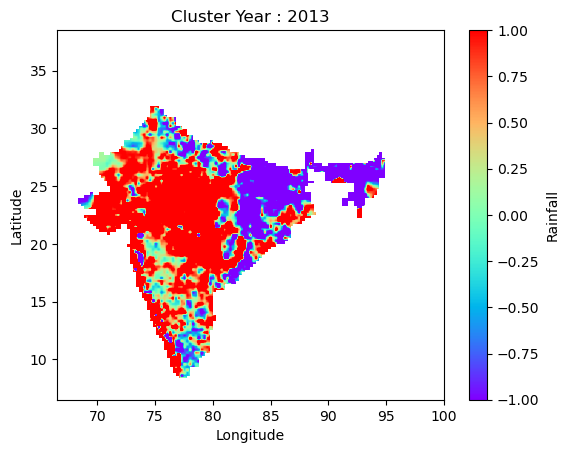

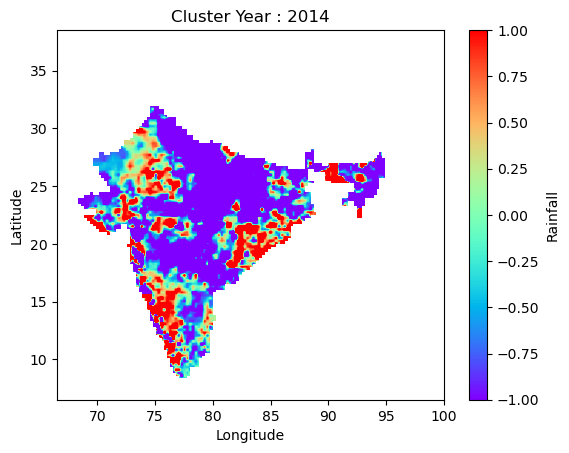

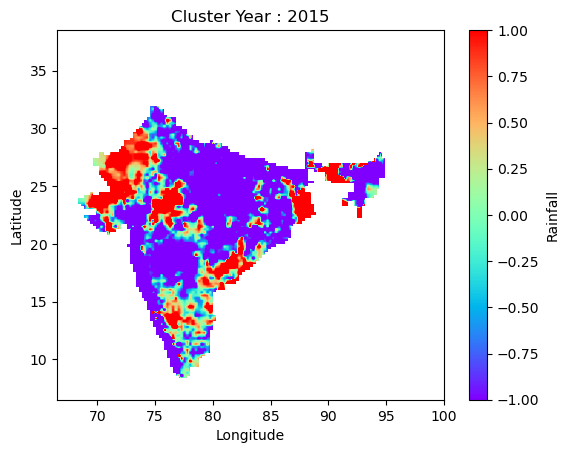

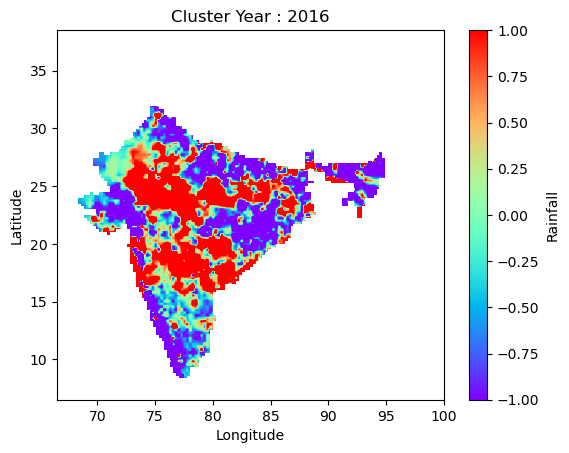

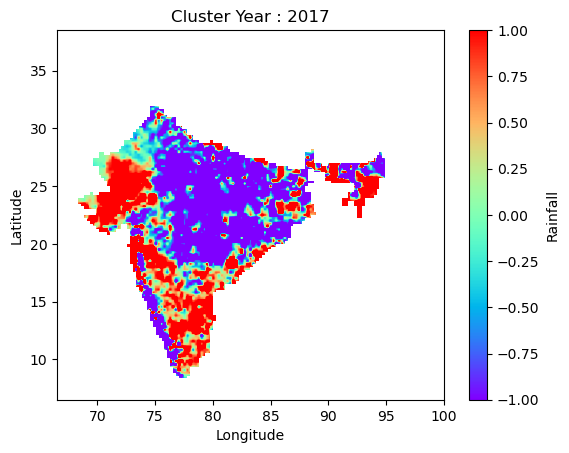

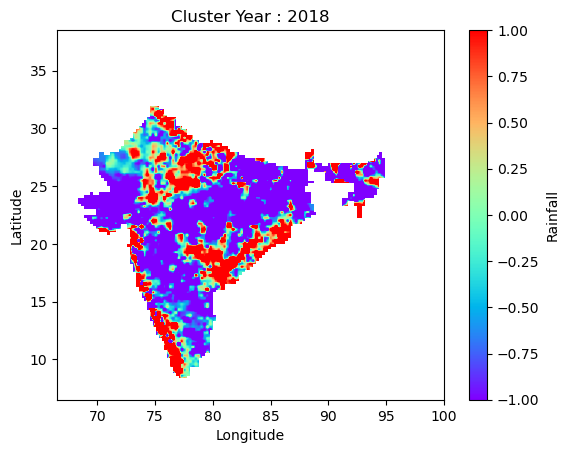

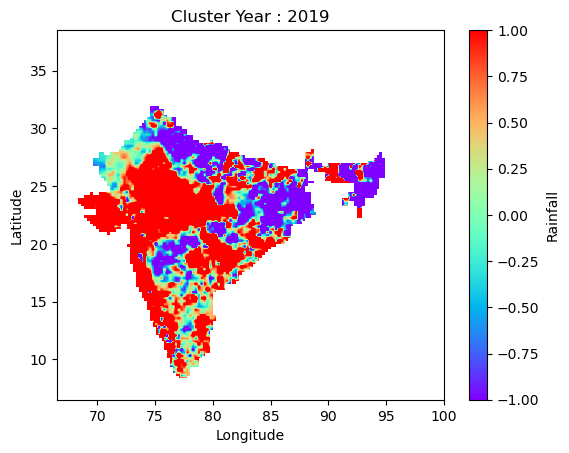

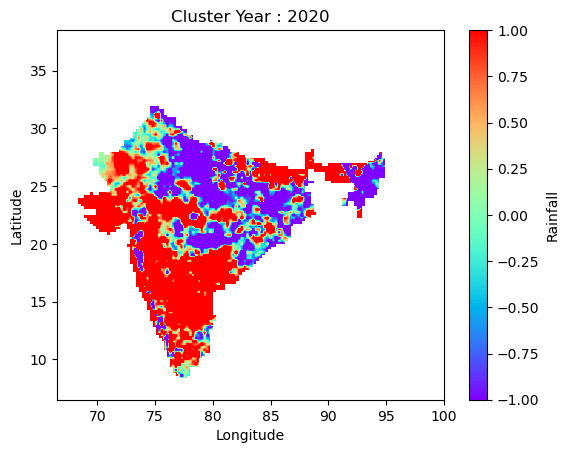

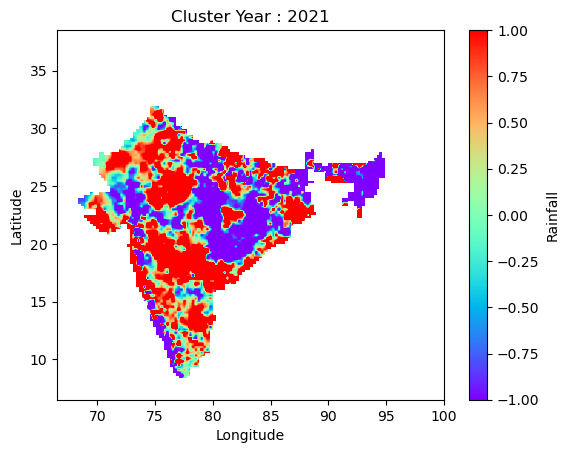

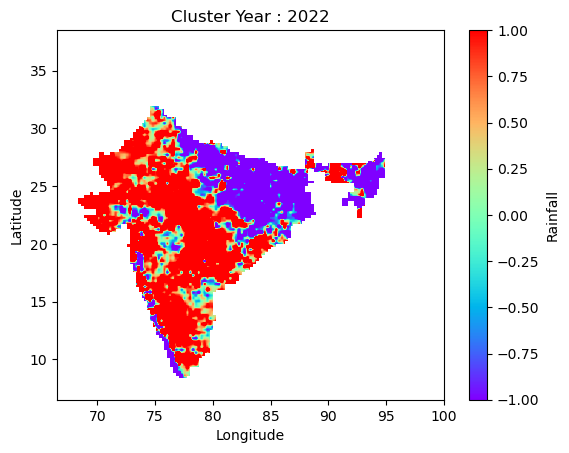

In [22]:
year=2011
for i in maps_of_predicts:
    PlotMap(i.to_array()[0],f"Year : {year}")
    year+=1

In [32]:
# df = pd.DataFrame(predicted, columns=(['Cluster Number']))
# df.to_csv('Cluster Number 2011-2022.csv')
# df

,Cluster Number
0,0
1,4
2,0
3,6
4,1
5,3
6,6
7,3
8,0
9,4
